# This is the development playground for functionalities for thermal profiler on DRU+ with Halliburton.

Now. Let's look at how each parameter affects the step response of the system when compared against the step input test data. This is for water at 600 rpm with 5% step input power.

In [ ]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *

# read in test data
for filename in ["step1_10p.csv", "step1_50p.csv", "step_5p.csv", "step_75p.csv", "glycerol_10p.csv"]:
    step_power = float(filename.split('p')[-2].split('_')[-1])/100
    my_fluid = MysteriousMud(filename)
    my_fluid.importRawData(filename, heaterHeader=True)

    model = ThermalModel(my_fluid)

    # self.thermal_resistances = [Rj,Rfj,Rf]
    # self.thermal_capacitances = [Cc, Cf]


    model.thermal_resistances = [.14, 2.210, 2.02, .0095] # Rf
    model.thermal_capacitances = [2000, 3000, 1200]

    model.thermal_resistances = [.14, 1.810, 1.32, .0095] # Rf
    model.thermal_capacitances = [2500, 3800, 1155]

    model.Tambient = 302


    x0 = np.array([1,1,1]) *  model.Tambient
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage = step_power)
    model.plot(stepResponse=True)

Let's test on a 3rd order model.

In [ ]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *

Ch = 1000 #cap_ss * density_ss * d_heat**2 /4 * np.pi * l_heat * n_heaters
Rc = .1
Rj = 10
Cc = 6000
Cf = 1200
Rf = 0.1
Rfj = 5


Tn = 1500


def ss_model(t,x): # x = [Th-Tamb, Tc-Tamb; Tf-Tamb]

        A = np.array([[-1/Ch * (1/Rc + 1/Rj), 1/(Rc*Ch), 0],
                [1/(Rc*Cc), -1/Cc * (1/Rc + 1/Rf), 1/(Rf*Cc)],
                [0, 1/(Rf*Cf), -1/Cf * (1/Rfj + 1/Rf)]])
        B = np.array([1/Ch, 0, 0]).transpose() 
        C = np.array([0, 0, 1])

        if t > 0 and t < Tn/3:
            p = 100
        else:
            p = 0
        
        d = 0
        if p > 0:
            p = min(abs(p),1000)
        else:
            p = 0

        xdot = A @ x + B*p + d

        #print(x.shape, xdot)
        return xdot

Tambient = 300
tvec = np.linspace(0,Tn,1000)
X0 = np.zeros(3)
sol = solve_ivp(ss_model,(tvec[0],tvec[-1]), X0, t_eval=tvec)

yout = sol.y
temp_mud = yout[2,:] + Tambient
temp_cell = yout[1,:] + Tambient
temp_heater = yout[0,:] + Tambient



plt.figure()
plt.plot(tvec,temp_heater, label = "heater temp")
plt.plot(tvec,temp_cell, label = "cell temp")
plt.plot(tvec,temp_mud, label = "mud temp")

plt.legend()

Looks a lot better!

# Now, testing plotting and simulation suites


FLUID DATA FOR calibration_fluid_50p.csv REFERENCED AT  01-Jul-24 15:27:17:848
###############  calibration_fluid_50p.csv   ################
Rc, Rj, Rfj, Rf: [0.13, 2.21, 2.02, 0.0095]
Ch, Cc, Cf: [2000, 3000, 450]
###################################################


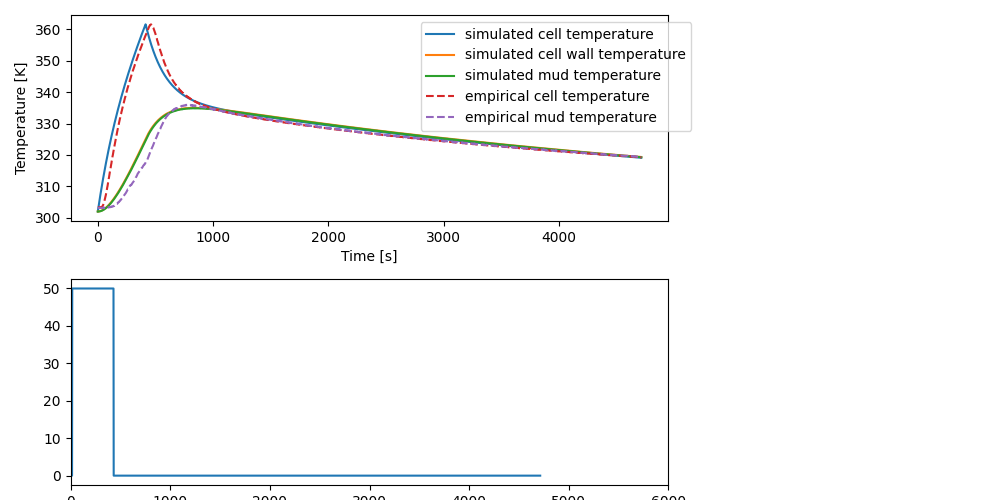

In [26]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *

# read in test data
for filename in ["calibration_fluid_50p.csv"]:

    step_power = float(filename.split('p')[-2].split('_')[-1])/100
    my_fluid = MysteriousMud(filename)
    try:
        my_fluid.importRawData(filename, heaterHeader=True)
    except FileNotFoundError:
        print(f"{filename} file not found!")
        continue

    except:
        raise

    model = ThermalModel(my_fluid)

    # self.thermal_resistances = [Rc, Rj,Rfj,Rf]
    # self.thermal_capacitances = [Ch, Cc, Cf]

    model.thermal_resistances = [.13, 2.210, 2.02, .0095] # Rf
    model.thermal_capacitances = [2000, 3000, 450]
    model.Tambient = 302

    x0 = np.array([1,1,1]) * model.Tambient
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage = step_power)
    model.plot()
    plt.xlim([0,6000])
 

 

FLUID DATA FOR water_50p.csv REFERENCED AT  02-Jul-24 14:39:28:736
###############  water_50p.csv   ################
Rc, Rj, Rfj, Rf: [0.125, 1.81, 1.32, 0.00095]
Ch, Cc, Cf: [2500, 3800, 1155]
###################################################
FLUID DATA FOR water_pid1.csv REFERENCED AT  02-Jul-24 19:52:02:652
###############  water_pid1.csv   ################
Rc, Rj, Rfj, Rf: [0.125, 1.81, 1.32, 0.00095]
Ch, Cc, Cf: [2500, 3800, 1155]
###################################################
FLUID DATA FOR water_111p.csv REFERENCED AT  02-Jul-24 14:39:22:736
###############  water_111p.csv   ################
Rc, Rj, Rfj, Rf: [0.125, 1.81, 1.32, 0.00095]
Ch, Cc, Cf: [2500, 3800, 1155]
###################################################
FLUID DATA FOR water_pid2.csv REFERENCED AT  02-Jul-24 19:51:52:650
###############  water_pid2.csv   ################
Rc, Rj, Rfj, Rf: [0.125, 1.81, 1.32, 0.00095]
Ch, Cc, Cf: [2500, 3800, 1155]
###################################################


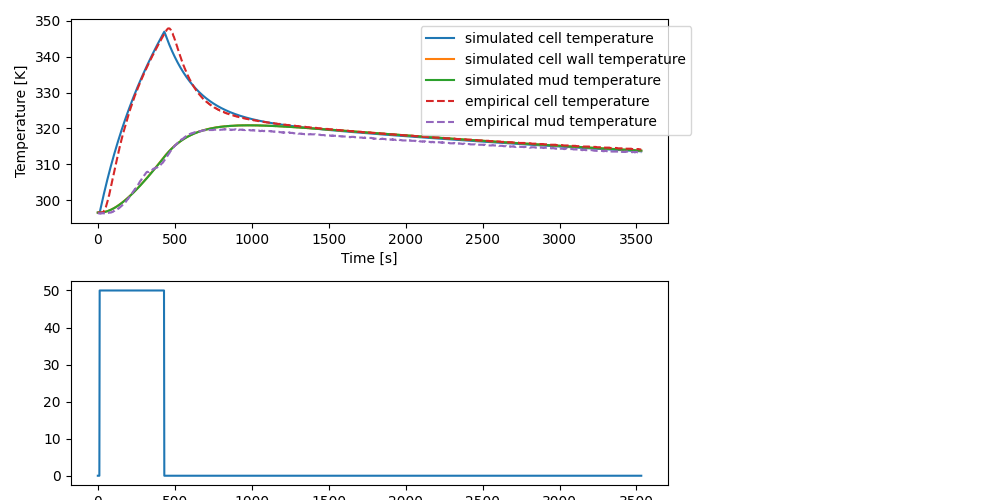

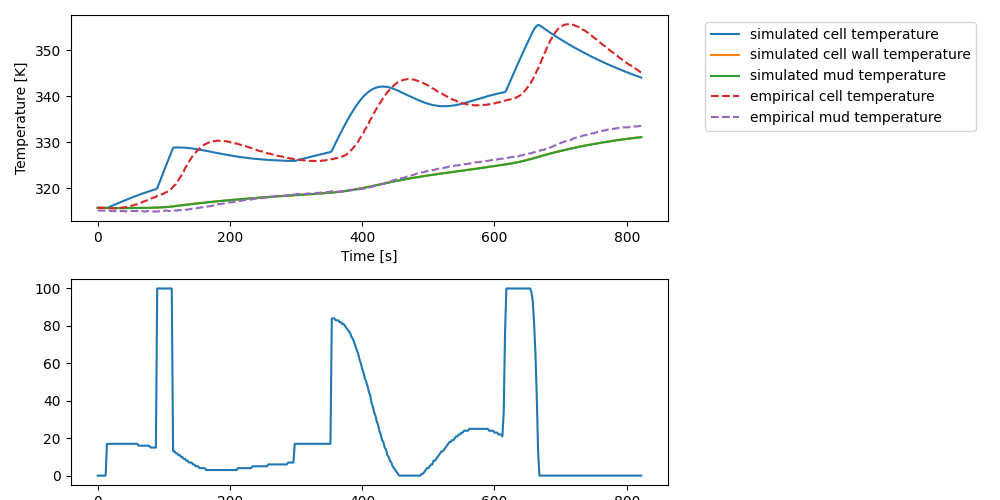

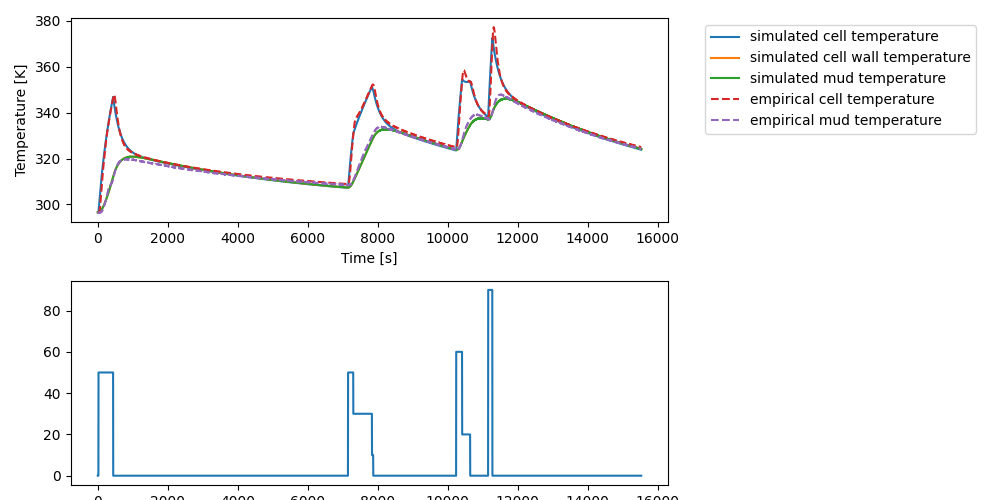

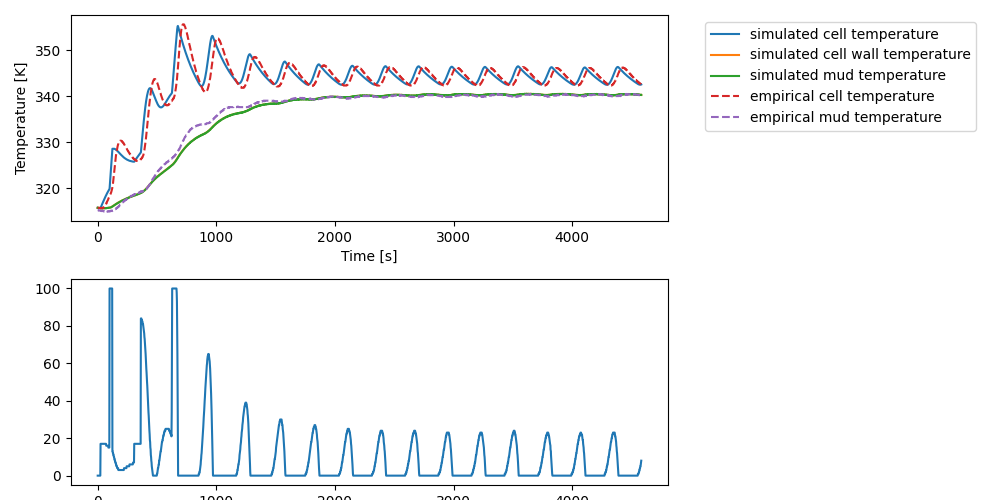

In [21]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *

# read in test data
for filename in ["water_50p.csv", "water_pid1.csv", "water_111p.csv", "water_pid2.csv"]:

    my_fluid = MysteriousMud(filename)
    try:
        my_fluid.importRawData(filename, heaterHeader=True)
    except FileNotFoundError:
        print(f"{filename} file not found!")
        continue

    except:
        raise

    model = ThermalModel(my_fluid)


    # self.thermal_resistances = [Rc, Rj,Rfj,Rf]
    # self.thermal_capacitances = [Ch, Cc, Cf]

    model.thermal_resistances = [.125, 1.810, 1.32, .00095] # Rf
    model.thermal_capacitances = [2500, 3800, 1155]
    model.Tambient = 300

    x0 = np.array([1,1,1]) * my_fluid.temp_cell[0]
    temp_cell, temp_mud = model.forcedResponse(x0)
    model.plot()

Now let's use recursive least squares parameter estimation to measure properties in real time!


In [ ]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *


# initialize RLS params
n = 8 # number of parameters
m = 3 # number of measured outputs

P0 = np.eye(n) * 1e10

# to simulate this, parse through each time step in a given data set

# read in test data
filename = "water_pid2.csv"
filename = "calibration_fluid_pid1.csv"

my_fluid = MysteriousMud(filename)
my_fluid.importRawData(filename, heaterHeader=True)

Nk = len(my_fluid.tvector)
sT = 1 # sampling time of sT seconds


Pp = P0
Powerp, Thp, Tcp, Tfp = 1,15,15,15


Rc, Rj, Rfj, Rf = [.14, 1.810, 1.32, .0095]
Ch, Cc, Cf = [2500, 3800, 1255]


thetap = np.array([sT/Ch, 1-sT*(1/Rj + 1/Rc)/Ch, sT/(Rc*Ch), 1 - sT*(1/Rc + 1/Rf)/Cc, sT/Rc/Cc, sT/Rf/Cc, sT/Rf/Cf, 1-sT*(1/Rf + 1/Rfj)/Cf])
c1,c2,c3,c4,c5,c6,c7,c8 = thetap

thetap.resize((n,1))

print("Right constants: ", thetap)

thetap = np.zeros((n,1))

theta_history = []





for k in range(Nk):

    yk = np.array([my_fluid.temp_cell[k], my_fluid.temp_fluid[k], my_fluid.temp_fluid[k]]) - 300

    
    Powerk = my_fluid.heater_dutycycle[k]/100 * 1000 # in Watts now


    Rk = np.eye(m)/10


    Hk = np.matrix([[Powerp, Thp, Tcp, 0,0,0,0,0],[0,0,0,Tcp,Thp,Tfp,0,0],[0,0,0,0,0,0,Tcp, Tfp]])


    bigInverse = (Hk @ Pp @ Hk.T + Rk).I
    Kk = Pp @ Hk.T @ bigInverse

    Pk = (np.eye(n) - (Kk @ Hk)) @ Pp

    #print('##########################')
    #print(Pk)

    theta_error = (yk.reshape(m,1) - (Hk@thetap))

    predicted_y = np.asarray(Hk@thetap)

    thetak =  np.asarray(thetap + Kk @ theta_error)
    thetak[0] = c1
    thetak[1] = c2
    thetak[2] = c3
    thetak[4] = c5
    thetak[3] = 1-c5-thetak[5]
    
    #print(yk - np.asarray((Hk@thetap).T))

    #thetak = abs(thetak)

    Pp = Pk
    thetap = thetak
    Thp, Tcp, Tfp = list(yk)
    Powerp = Powerk
    theta_history.append(predicted_y)
    

print("Done running RLS!")

print("Parameters: ", thetak)

print(np.max(Pk))

c1,c2,c3,c4,c5,c6,c7,c8 = [x[0] for x in thetak]

Ch = sT/c1
Rc = sT/(Ch*c3)
Rj = 1/((1-c2)/sT * Ch - 1/Rc)
Cc = sT/(Rc*c5)
Rf = sT/(Cc*c6)
Cf = sT/(Rf*c7)
Rfj = 1/(Cf*(1-c8)/sT - 1/Rf)

print("c456 sum [should be close to 1]: ", c4 + c5 + c6)



model = ThermalModel(my_fluid)

model.thermal_resistances = [Rc, Rj,Rfj,Rf]
model.thermal_capacitances = [Ch, Cc, Cf]

model.Tambient = 300

x0 = np.array([304,302,302]) 
temp_cell, temp_mud = model.forcedResponse(x0)
model.plot()

##

# look at what RLS is cookin'


mean_error = np.array(theta_history)

plt.figure()
plt.plot(my_fluid.tvector,mean_error[:,0])
plt.plot(my_fluid.tvector,mean_error[:,1])
plt.plot(my_fluid.tvector,mean_error[:,2])

plt.plot(my_fluid.tvector,my_fluid.temp_cell-300,'--')
plt.plot(my_fluid.tvector,my_fluid.temp_fluid-300,'--')

Interesting how the RLS think's it's on the money, when it's not. I'm thinking this is because of the lack of the forgetting factor or the model is not discretized properly.

# Looking at sensitivity of each parameter.

For each parameter, loop through interval and plot mean error against the parameter value. Look for concavity if any. Refer to the sensitivity_studies.ipynb file for more info.

In [ ]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *

# read in test data
for filename in ["glycerol_50p.csv"]:

    my_fluid = MysteriousMud(filename)
    my_fluid.importRawData(filename, heaterHeader=True)
    model = ThermalModel(my_fluid)


    mean_errors = []
    p_space = np.linspace(100,2000,40)
    for p in p_space:
        model.thermal_resistances = [.14, 1.810, 1.32, .0095] # Rf
        model.thermal_capacitances = [2500, 3800, p] #1155]
        model.Tambient = 300

        x0 = np.array([1,1,1]) * my_fluid.temp_cell[0]
        temp_cell, temp_mud = model.forcedResponse(x0)
        mean_error = ((temp_cell - my_fluid.temp_cell)**2 + (temp_mud - my_fluid.temp_fluid)**2)**.5
        mean_errors.append(np.sum(mean_error))
    
    mean_errors = np.array(mean_errors)
    plt.figure()
    plt.plot(p_space,mean_errors)
    


        #model.plot()

Confirming that the expm function works against the Cayley Hamilton method

Looking at Cayley-Hamilton compared to python's expm function

In [ ]:
import numpy as np
from scipy.linalg import expm, logm

A = np.matrix([[0.76330305, 0.15036146, 0.70429554], 
 [0.14351586, 0.37585963, 0.11562032],
 [0.59144264, 0.86482302, 0.19785867]])


print(A)
l1,l2,l3 = np.linalg.eigvals(A)

k = np.matrix([[1,l1,l1**2],[1,l2,l2**2], [1,l3,l3**2]])
x = np.array([np.exp(2*l1), np.exp(2*l2), np.exp(2*l3)])
alphas = k.I @ x


a1,a2,a3 = alphas[0,0], alphas[0,1], alphas[0,2]

eACH = a1 * np.eye(3) + a2 * A + a3 * A**2

eA = expm(A) @ expm(A)

print(eA - eACH) # the difference should be close to 0

print(logm(eA)/2) # getting A back
